##Loading Libraries





In [ ]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from google.colab import files 
import missingno as miss
from sklearn.metrics import accuracy_score

##Extracting Data

In [ ]:

files.upload()
#select diabetes files from the downloads
diabetes = pd.read_csv('diabetes.csv')



Saving diabetes.csv to diabetes.csv


##Pre-Processing the data

In [ ]:
#reading the data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


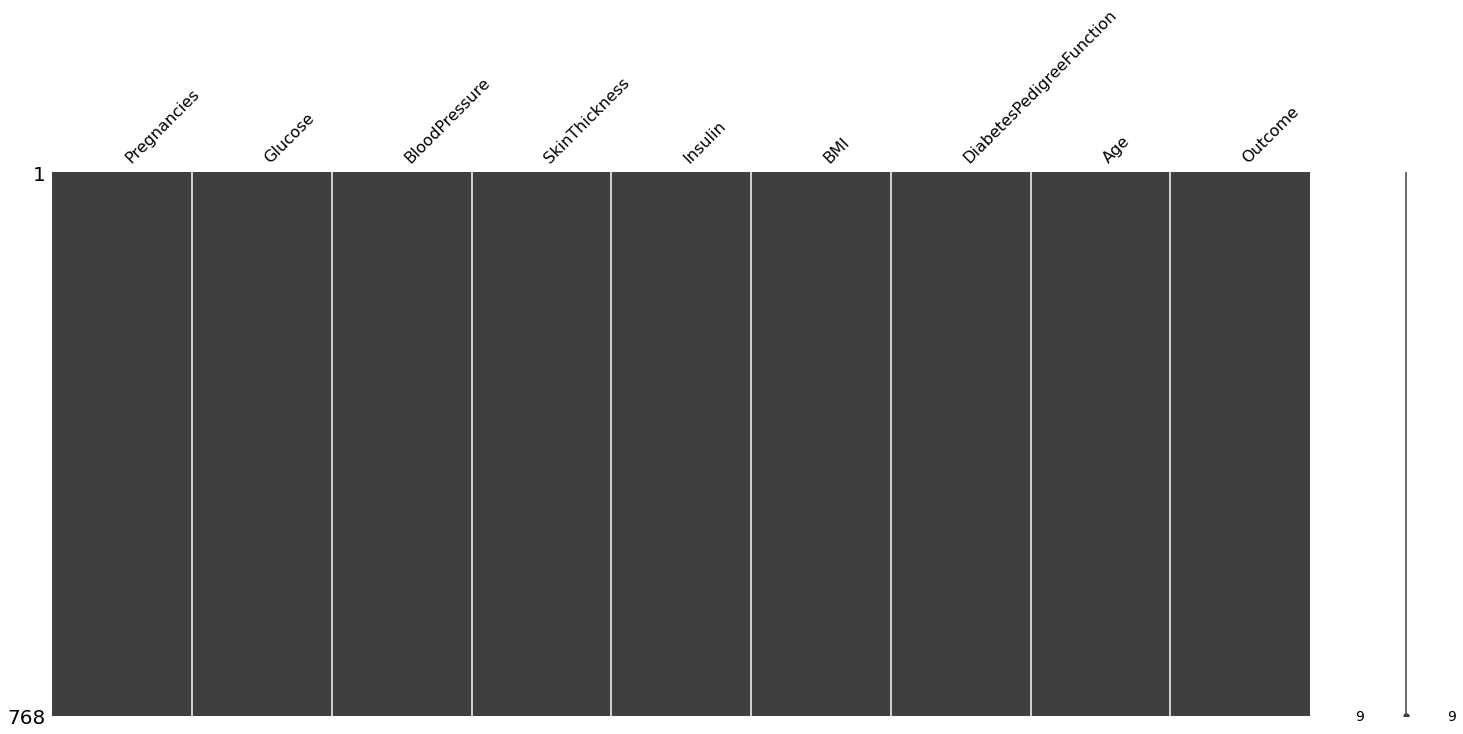

In [ ]:
#checking for missing values
miss.matrix(diabetes)

In [ ]:
#cleaning the data and removing the 0s
print(diabetes.dtypes)
numeric_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI'] 
mean = diabetes[numeric_features].mean()
diabetes[numeric_features]=diabetes[numeric_features].replace(0, mean)
features=np.array(diabetes.columns)
print(features)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [ ]:
print(diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

##Creating Test and Training sets

In [ ]:
rows=diabetes.shape[0]
spliting_factor=int(rows*0.85)
for i in features[:-1]:
    std = diabetes[i][:spliting_factor].std() 
    mean =  diabetes[i][:spliting_factor].mean()
    diabetes[i]=(diabetes[i]-mean)/std

#scale y to {-1,+1}
diabetes.loc[(diabetes[features[-1]] ==0)] = -1
diabetes_train = diabetes.iloc[:spliting_factor,:].to_numpy()
diabetes_test = diabetes.iloc[spliting_factor:,:].to_numpy()
std,mean

X_train = np.array(diabetes_train[:,:-1])
y_train = np.array(diabetes_train[:,-1])

X_test = np.array(diabetes_test[:,:-1])
y_test = np.array(diabetes_test[:,-1])


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(652, 8)
(652,)
(116, 8)
(116,)


##Implementing Perceptron Algorithm

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$

In [ ]:
class Perceptron:
  
    def __init__ (self):
        self.weight = None
        self.bias = None
    
    def function(self, x):
        return 1 if (np.dot(self.weight, x) >= self.bias) else -1
    
    def predict_y(self, X):
        Y = []
        for x in X:
            result = self.function(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, learning_rate = 1):
    
        self.weight = np.ones(X.shape[1])
        self.bias = 0

        accuracy = {}
        max_accuracy = 0

        weight_matrix = []

        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.function(x)
                if y == 1 and y_pred == 0:
                    self.weight = self.weight + learning_rate * x
                    self.bias = self.bias - learning_rate * 1
                elif y == 0 and y_pred == 1:
                    self.weight = self.weight - learning_rate * x
                    self.bias = self.bias + learning_rate * 1

            weight_matrix.append(self.weight)    
            accuracy[i] = accuracy_score(self.predict_y(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                j = i
                checkpoint_weight = self.weight
                checkpoint_bias = self.bias

        self.weight = checkpoint_weight
        self.bias = checkpoint_bias

        print(max_accuracy,j)
        #print(accuracy.values())
        plt.plot(list(accuracy.values()))
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()
        return np.array(weight_matrix)

In [ ]:
perceptron = Perceptron()


0.995398773006135 0


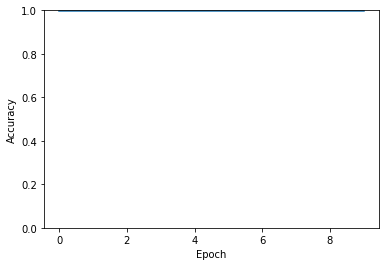

In [ ]:
weight_matrix = perceptron.fit(X_train, y_train, 10, 0.7)

In [ ]:
Y_pred_test = perceptron.predict_y(X_test)

0.9913793103448276


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
#Accuracy
final_model = confusion_matrix( y_test, Y_pred_test)
accuracy = accuracy_score(y_test , Y_pred_test)
precision = precision_score(y_test , Y_pred_test)
recall = recall_score(y_test , Y_pred_test)
f1 = f1_score(y_test,Y_pred_test) 
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.9914, precision: 1.0000, recall: 0.9778,F1: 0.9888


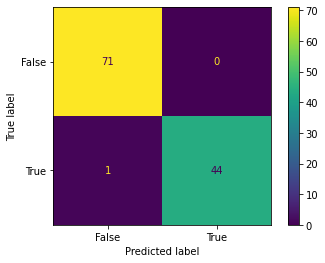

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, Y_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

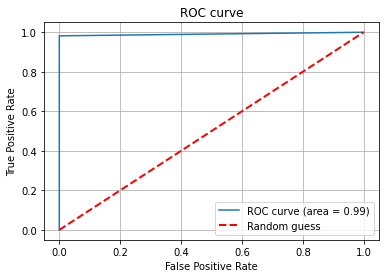

In [ ]:
fpr,tpr, thresh = metrics.roc_curve(y_test, Y_pred_test)

auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()